# STEP 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('dataframe_.csv')
df.head(5)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [3]:
df['output'].value_counts()

-95.000000     32
-33.000000     12
-78.000000     12
-32.000000     10
-75.000000     10
               ..
-108.925420     1
-80.761170      1
-89.922634      1
-109.797457     1
 123.087950     1
Name: output, Length: 969, dtype: int64

# STEP 2

In [4]:
df.fillna(method='ffill',inplace= True)

In [5]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1697 non-null   float64
 1   output  1697 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [7]:
df.describe()

,input,output
count,1697.000000,1697.000000
mean,1.225637,-34.042227
std,79.029039,65.778771
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.382214,-50.376850
75%,70.264109,-11.000000
max,134.605775,134.425495


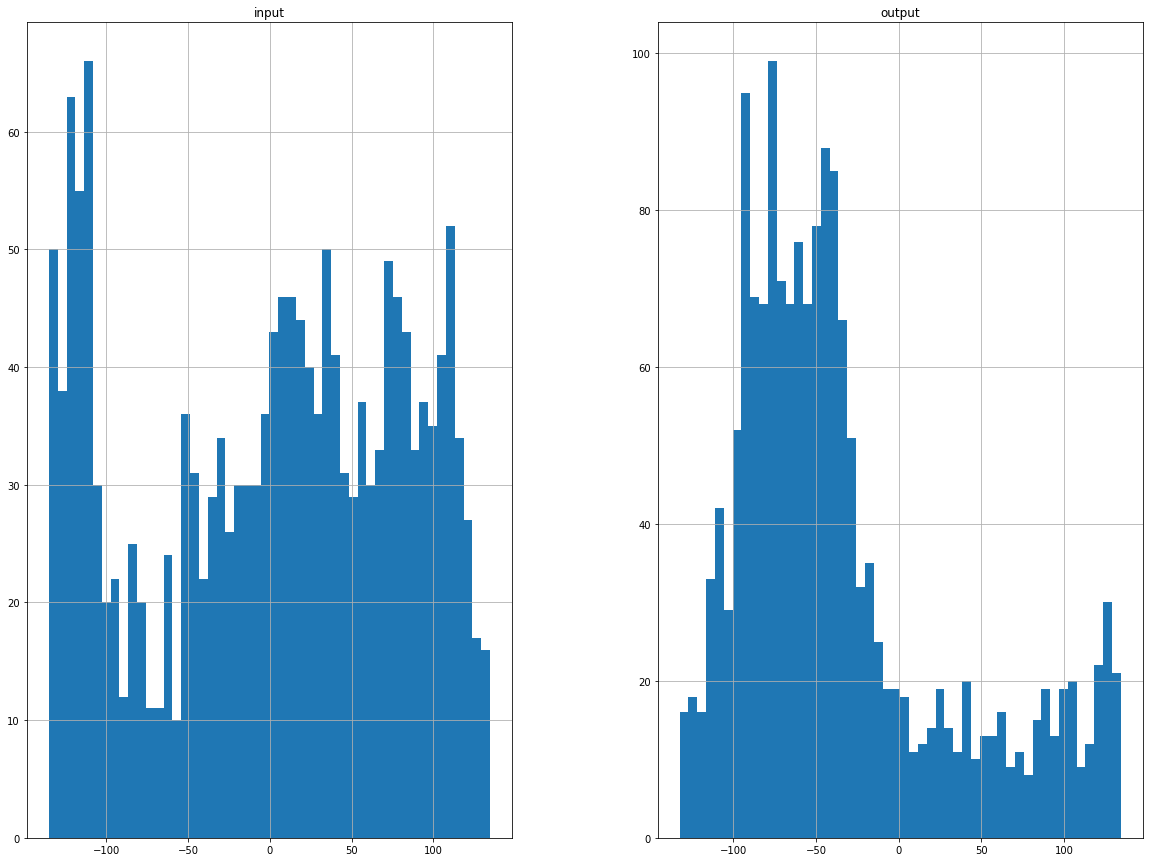

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

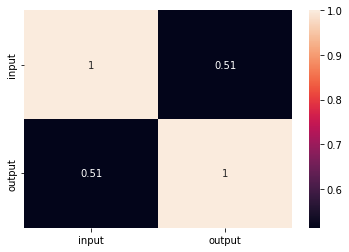

In [9]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

# STEP 3

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [11]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
# Separate the predictors (X) and targets (y)
X_train = train_set.drop("output", axis=1)
y_train = train_set["output"]

In [13]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# STEP 4

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [15]:
# Detect and treat outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outliers = outlier_detector.fit_predict(df)
df = df[outliers == 1]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [16]:

# Feature engineering
def feature_engineer(df):
    df["new_feature"] = df["input"] + df["output"]
    return df

df = feature_engineer(df)

In [17]:
# Separate the predictors (X) and targets (y)
X = df.drop("output", axis=1)
y = df["output"]

In [18]:
# Preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), X.columns)
    ])

model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

In [19]:
# Grid search for hyperparameter tuning
param_grid = {
    "model__max_depth": [None, 5, 10, 15],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2,5],
 "model__max_features": ["auto", "sqrt", "log2"],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['input', 'new_feature'], dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None, 5, 10, 15],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 5],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [20]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = grid_search.best_estimator_
final_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['input', 'new_feature'], dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

# STEP 5

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
y_pred = final_model.predict(X)


In [ ]:
mse = mean_squared_error(X,'y_pred')
r2 = r2_score(X, y_pred)

In [ ]:
model_scores = {"Final Model": (mse, r2)}

In [ ]:
model_scores

# STEP 6

In [43]:
from sklearn.linear_model import LinearRegression

# Feature engineering
df = feature_engineer(df)

# Separate the predictors (X) and targets (y)
X = df.drop("output", axis=1)
y = df["output"]

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

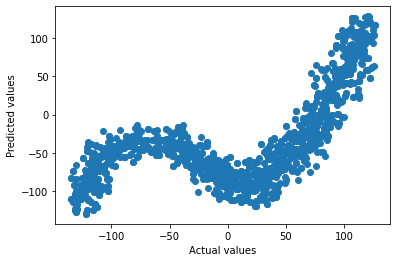

In [46]:
plt.scatter(X["input"],y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()